In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import splev, splrep

In [2]:
file=open('33.txt')
d33=[]
for s in file.read().split('\n'):
    b=[]
    if len(s)==0 : continue
    for i in range(len(s.split('\t'))):
        b+=[float(s.split('\t')[i])]
    d33.append(b)
file.close()

file=open('55.txt')
d55=[]
for s in file.read().split('\n'):
    b=[]
    if len(s)==0 : continue
    for i in range(len(s.split('\t'))):
        b+=[float(s.split('\t')[i])]
    d55.append(b)
file.close()

file=open('88.txt')
d88=[]
for s in file.read().split('\n'):
    b=[]
    if len(s)==0 : continue
    for i in range(len(s.split('\t'))):
        b+=[float(s.split('\t')[i])]
    d88.append(b)
file.close()

In [3]:
def correction(d):
    d[14],d[13]=d[13],d[14]
    d[13],d[12]=d[12],d[13]
    d[12],d[11]=d[11],d[12]
    d[11],d[10]=d[10],d[11]

In [4]:
d33_mean=np.mean(d33, axis=0)
d55_mean=np.mean(d55, axis=0)
d88_mean=np.mean(d88, axis=0)
# print(d88_mean)
# print('\n')

correction(d33_mean)
correction(d55_mean)
correction(d88_mean)
print(d88_mean)

[89.37074661 23.07412217  2.82655204 -0.69562896 -0.71906335 -6.62651584
 -8.28118552 -6.80137557 -9.28554751 -9.4159819  -9.36312217 -9.61750226
 -9.01352941 -7.95070136 -6.31040724]


In [5]:
d33_mean = (d33_mean*6894.76) + 101325
d55_mean = (d55_mean*6894.76) + 101325
d88_mean = (d88_mean*6894.76) + 101325

In [6]:
def mach(d):
    m=[]
    for j in range(1,d.size):
        m.append(((((d[0]/d[j])**(2/7))-1)*5)**0.5)
    return m

In [24]:
m33=mach(d33_mean)
m55=mach(d55_mean)
m88=mach(d88_mean)

In [8]:
# sam=np.array([3,3.5,4.5,5.1,5.8,6.5,7.2,7.9,8.9,9.4,12.1,14.1,16.1,18.4,20.6,22.6,24.8,27])
sam=np.array([3,3.5,4.5,5.1,5.8,6.5,7.9,8.9,12.1,16.1,20.6,22.6,24.8,27])
sam=(sam-27)*(-1)
x=sam[::-1]

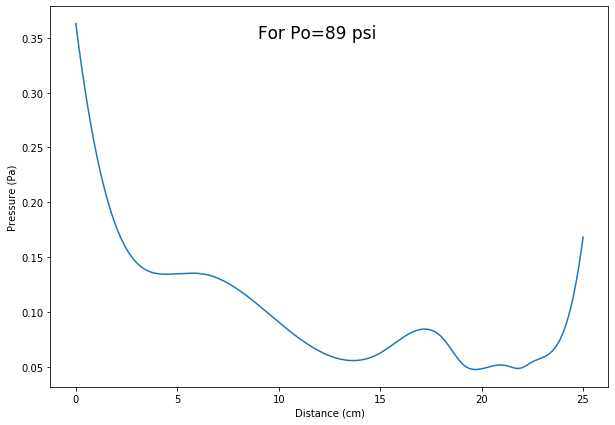

In [13]:
# 1,2,3,4,6,8,10,11,13,14,15,16,17,18

# plt.plot(x,d88_mean[1:]/d88_mean[0])
de=d88_mean
spl1 = splrep(x,de[1:]/de[0])
x2 = np.linspace(0, 25, 1000)
y2 = splev(x2, spl1)

fig = plt.figure(figsize=(10,7))
plt.plot(x2,y2)
plt.xlabel('Distance (cm)')
plt.ylabel('Pressure (Pa)')
plt.text(9,0.35,'For Po=89 psi',fontsize=17)
fig.savefig('Press88.png')

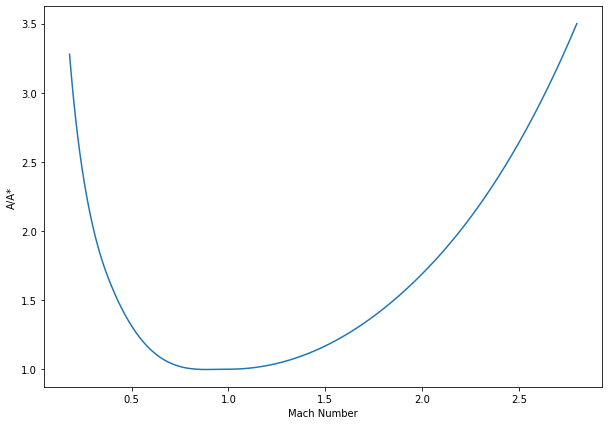

In [10]:
A=np.array([2.8, 4.5, 6.1, 7, 8.3, 8.7, 8.9, 9])
u=A[0]
g=np.array([ 1.00346742,  1.94074305,  2.29264562,  2.44276484,  2.62472951,  2.67453086,  2.69852730,  2.71031379])
A=np.append(A[::-1],A)
gb=np.array([0.98907910, 0.39482193, 0.27815786, 0.23954284, 0.19994521, 0.19032666,  0.18586372, 0.18371149])
g=np.append(gb[::-1],g)

spl1 = splrep(g, A/u)
x2 = np.linspace(0.18, 2.8, 1000)
y2 = splev(x2, spl1)

fig1 = plt.figure(figsize=(10,7))
plt.plot(x2,y2)
plt.xlabel('Mach Number')
plt.ylabel('A/A*')
fig1.savefig('Area.png')

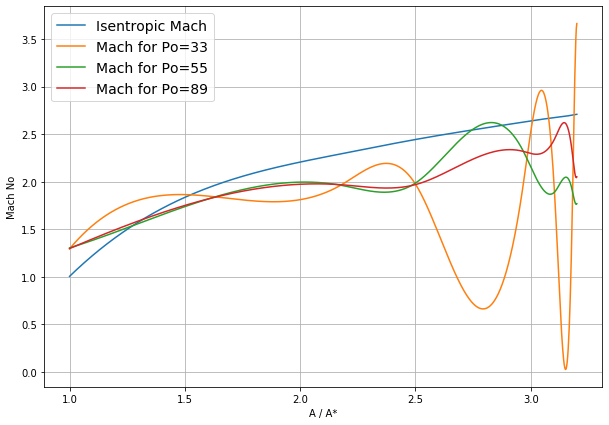

In [32]:
nm=np.array([1.00346742,  1.94074305,  2.29264562,  2.44276484,  2.62472951,  2.67453086,  2.69852730,  2.71031379
            ,  2.710313791,  2.710313792,  2.710313793,  2.710313794,  2.710313795,  2.710313796])
area=np.array([2.8, 4.5, 6.1, 7, 8.3, 8.7, 8.9, 9,9.001,9.002,9.003,9.004,9.005,9.006])
u=area[0]

# fig, ax = plt.subplots(figsize=(10,7))
# ax.plot(area/u,nm,label='Isentropic Mach')
# ax.plot(area/u,m33,label='Mach for Po=33')
# ax.plot(area/u,m55,label='Mach for Po=55')
# ax.plot(area/u,m88,label='Mach for Po=89')
# ax.legend(prop={'size': 14})
# fig.savefig('Compare.png')

s1 = splrep(area/u, nm)
p = np.linspace(1, 3.2, 1000)
q1 = splev(p, s1)

s2 = splrep(area/u, m33)
q2 = splev(p, s2)

s3 = splrep(area/u, m55)
q3 = splev(p, s3)

s4 = splrep(area/u, m88)
q4 = splev(p, s4)

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(p,q1,label='Isentropic Mach')
ax.plot(p,q2,label='Mach for Po=33')
ax.plot(p,q3,label='Mach for Po=55')
ax.plot(p,q4,label='Mach for Po=89')
ax.set_xlabel('A / A*')
ax.set_ylabel('Mach No')
ax.grid()
ax.legend(prop={'size': 14})
fig.savefig('Compare.png')

In [12]:
area/u

array([1.        , 1.60714286, 2.17857143, 2.5       , 2.96428571,
       3.10714286, 3.17857143, 3.21428571, 3.21464286, 3.215     ,
       3.21535714, 3.21571429, 3.21607143, 3.21642857])